In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [10]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    return sigm(z)*(1.0 - sigm(z))

In [11]:
class MultyLayerNetwork:
    def __init__(self,linput,lhidden,loutput,training_inputs,training_outputs):
        """
        
        :param linput: number of inputs
        :param lhidden: number of hidden layer
        :param loutput: number of outputs
        :param training_inputs: value of training inputs
        :param training_outputs: value of training outputs
        """
        self.linput = linput
        self.lhidden = lhidden
        self.loutput = loutput
        
        self.train_inputs = training_inputs
        self.train_outputs = training_outputs
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w_input_to_hidden = np.random.randn(lhidden,linput)# (2,2) matrix of 2 hidden and 2 inputs
        self.bias_hidden = np.random.randn(lhidden,1)# (2,1) 2 hidden 1 bias
        
        # output layer has 1 neuron
        self.w_hidden_to_output = np.random.randn(loutput,lhidden)#(1,2) 1 output, 2 hidden
        self.bias_output = np.random.randn(loutput,1)# (1,1) 1 output 1 bias
        

    def feedforward(self, input_data_set):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w_input_to_hidden.dot(input_data_set) + self.bias_hidden)#output hidden
        a3s = sigm(self.w_hidden_to_output.dot(a2s) + self.bias_output)#output of output
        return a3s

    
    def backprop(self, input_data_set, output_data_set):
        del_w_input_hidden = np.zeros(self.w_input_to_hidden.shape, dtype=float)
        del_bias_hidden = np.zeros(self.bias_hidden.shape, dtype=float)
        
        del_w_hidden_output = np.zeros(self.w_hidden_to_output.shape, dtype=float)
        del_bias_output = np.zeros(self.bias_output.shape, dtype=float)
        cost = 0.0
        
        for single_input,single_output in zip(input_data_set,output_data_set):    #xs=input data set \\ ys=output data set \\x= input expected \\ y=output     
            a1 = single_input.reshape(self.linput,1)  # convert input vector x into (2,1) column vector
            single_output = single_output.reshape(self.loutput,1)
            
            #feedforward - input signal
            z2 = self.w_input_to_hidden.dot(a1) + self.bias_hidden   # so will z2 and a2 
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w_hidden_to_output.dot(a2) + self.bias_output   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            #/////
            
            #calculate the error from output to hidden
            error_output_hidden= (a3-single_output) #* sigm_deriv(z3)  #comment only for cross entropy                # delta3.shape is (1,1)
           
           #error from hidden to input
            error_hidden_input = sigm_deriv(z2) * (self.w_hidden_to_output.T.dot(error_output_hidden))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            
            #summing up the error terms for each input
            del_bias_output += error_output_hidden
            del_w_hidden_output += error_output_hidden.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_bias_hidden += error_hidden_input
            del_w_input_hidden += error_hidden_input.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
            #///////
           
           
            #cost += ((a3 - single_output)**2).sum() #distance from target 
            cost += -np.sum(single_output * np.log(a3) +  (1 - single_output) * np.log(1-a3)) #cross entropy function
        
        n = len(output_data_set)  # number of training vectors           
        # get the average change per training input  
        return del_bias_hidden/n, del_w_input_hidden/n, del_bias_output/n, del_w_hidden_output/n, cost/n
        
    def train(self, epochs, eta):
        input_data_set = self.train_inputs
        output_data_set = self.train_outputs
        cost = np.zeros((epochs,))
        
        for i in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[i] = self.backprop(input_data_set,output_data_set)
                
            #eta=learning rate
            self.bias_hidden -= eta * d_b2
            self.w_input_to_hidden -= eta * d_w2
            self.bias_output -= eta * d_b3
            self.w_hidden_to_output -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
    def predict_single(self, data_input):
        data_input = self.feedforward(data_input)
        
        if data_input > 0.5:
            return 1
        else:
            return 0
        
    #for array output
    def predict_multiple(self, data_input):
        data_input = self.feedforward(data_input)
        
        result = list()
        for i in data_input:
            if i > 0.95:
                result.append(1)
            else:
                result.append(0)
                
        return result
    

[[0.4321933  0.52195082 0.43163385 0.51250656]]
[[3.83580806e-04 9.99076713e-01 9.99950344e-01 4.03867154e-04]]
1


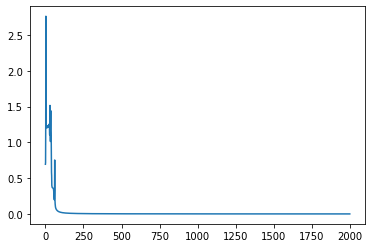

In [12]:
#problem1 /////

epochs = 2000
predict = np.array([[1],[0],[1]])
input_data = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
output_data = np.array([0,1,1,0])
problem1 = MultyLayerNetwork(3,4,1, input_data, output_data)

print(problem1.feedforward(input_data.T))

problem1.train(epochs,11.0)
print(problem1.feedforward(input_data.T))

print(problem1.predict_single(predict))

[[0.69481429 0.39721755 0.61183155 0.43512822 0.70867341 0.39502169
  0.62080902]
 [0.57757259 0.64560394 0.3358959  0.34234498 0.51211607 0.53193904
  0.56013564]]
[[9.99907483e-01 6.94521300e-04 9.99999434e-01 9.99939309e-01
  9.99933187e-01 9.99274505e-01 9.99955953e-01]
 [6.33263682e-04 9.99982448e-01 9.99832048e-01 4.24431747e-04
  2.82891271e-04 9.99378566e-01 9.99778126e-01]]
[1, 0]


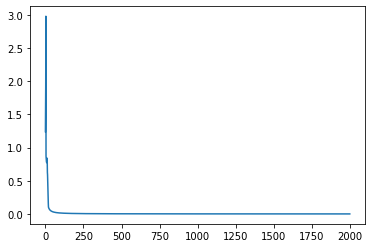

In [13]:
#problem2 /////

epochs = 2000
predict = np.array([[1],[1],[0]])
input_data = np.array([[1,1,0], [1,-1,-1], [-1,1,1], [-1,-1,1], [0,1,-1], [0,-1,-1], [1,1,1]])
output_data = np.array([[1,0], [0,1], [1,1], [1,0], [1,0], [1,1], [1,1]])
problem2 = MultyLayerNetwork(3,4,2, input_data, output_data)

print(problem2.feedforward(input_data.T))

problem2.train(epochs,11.0)
print(problem2.feedforward(input_data.T))

print(problem2.predict_multiple(predict))


female that owns 1 car, willing to pay cheap travel cost and has medium income level : Recommended transport is train 



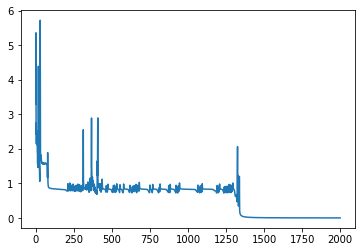

In [20]:
#problem3 /////

epochs = 2000
predict = np.array([[1], [1], [0], [1]])
input_data = np.array([[0,0,0,0], [0,1,0,1], [1,1,0,1], [1,0,0,0], [0,1,0,1], [0,0,1,1], [1,1,1,1], [1,1,2,2], [0,2,2,1], [1,2,2,2]])
output_data = np.array([[0,1,0], [0,1,0], [0,0,1], [0,1,0], [0,1,0], [0,0,1], [0,0,1], [1,0,0], [1,0,0], [1,0,0]])
problem3 = MultyLayerNetwork(4,4,3, input_data, output_data)

problem3.train(epochs,11.0)

rtransport = problem3.predict_multiple(predict)


gender = ""
carOwnership = ""
travelCost = ""
incomeLevel = ""
transport = ""

if predict[0][0] == 1:
    gender = "female"
else:
    gender = "male"
    
if predict[1][0] == 0:
    carOwnership = "no car"
elif predict[1][0] == 1:
    carOwnership = "1 car"
elif predict[1][0] == 2:
    carOwnership = "2 cars"
    
if predict[2][0] == 0:
    travelCost = "cheap"
elif predict[2][0] == 1:
    travelCost = "standard"
elif predict[2][0] == 2:
    travelCost = "expensive"   

if predict[3][0] == 0:
    incomeLevel = "low"
elif predict[3][0] == 1:
    incomeLevel = "medium"
elif predict[3][0] == 2:
    incomeLevel = "high" 
    
if rtransport == [0 , 0, 1]:
    transport = "train"
elif rtransport == [0 , 1, 0]:
    transport = "bus"
elif rtransport == [1 , 0, 0]:
    transport = "car"
    
transportMode = "%s that owns %s, willing to pay %s travel cost and has %s income level : Recommended transport is %s \n"% (gender,carOwnership,travelCost,incomeLevel,transport)

data = {'gender': gender, 'carOwnership': carOwnership,  'travelCost': travelCost, 'incomeLevel': incomeLevel, 'transport': transport} 
df = pd.DataFrame(data,
                  columns=["gender", "carOwnership", "travelCost", "incomeLevel", "transport"],
                  index=[0])

df.to_csv('transport.csv', header=True)
print(transportMode)

In [ ]:
#problem4 /////

iris = load_iris()
epochs = 5000
predict = np.array([[6.4],[2.7],[5.3], [1.9]])
input_data = iris.data
training_output = iris.target
new_output = list()

for i in training_output:
    if i == 0:
        new_output.append([1,0,0])
    elif i == 1:
        new_output.append([0,1,0])
    else:
        new_output.append([0,0,1])

training_output = np.array(new_output)

problem4 = MultyLayerNetwork(4,4,3, input_data, training_output)

problem4.train(epochs,0.05)

flower = problem4.predict_multiple(predict)

if flower == [1,0,0]:
    print("Iris-Setosa")
elif flower == [0,1,0]:
    print("Iris-Versicolour")
elif flower == [0,0,1]:
    print("Iris-Virginica")
else:
    print("Could not identify flower")